Trying Jupyter Notebook because I kinda like it. \n Still figuring out how this works. \n
In this file I'll try to create some good overview of our data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import seaborn as sns


Importing the data. More information: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset/data


In [11]:
data = pd.read_csv(
        filepath_or_buffer="../data/2025_cardio_train.csv",
        index_col=0,
        na_filter=False,
        dtype = {"gender": "category",
                 "cholesterol": "category",
                 "gluc": "category",
                 "smoke": "category",
                 "alco": "category",
                 "active": "category",
                 "cardio": "category",
        }
)
data["cholesterol"] = data["cholesterol"].cat.as_ordered()
data["gluc"] = data["gluc"].cat.as_ordered()


Output test like in Hw02:

In [12]:
data["cholesterol"] = data["cholesterol"].cat.as_ordered()
data["gluc"] = data["gluc"].cat.as_ordered()
for var in data.columns:
    print(f"Variable {var} in type {data[var].dtype} with {data[var].nunique()} unique values ")
    if data[var].dtype == "category":
        print(f"| is it ordered?   {data[var].cat.ordered}")
print(f"Cholesterol: {data["cholesterol"].unique()}")
print(f"Gluc: {data['gluc'].unique()}")


Variable age in type int64 with 8076 unique values 
Variable gender in type category with 2 unique values 
| is it ordered?   False
Variable height in type int64 with 109 unique values 
Variable weight in type float64 with 287 unique values 
Variable ap_hi in type int64 with 153 unique values 
Variable ap_lo in type int64 with 157 unique values 
Variable cholesterol in type category with 3 unique values 
| is it ordered?   True
Variable gluc in type category with 3 unique values 
| is it ordered?   True
Variable smoke in type category with 2 unique values 
| is it ordered?   False
Variable alco in type category with 2 unique values 
| is it ordered?   False
Variable active in type category with 2 unique values 
| is it ordered?   False
Variable cardio in type category with 2 unique values 
| is it ordered?   False
Cholesterol: ['1', '3', '2']
Categories (3, object): ['1' < '2' < '3']
Gluc: ['1', '2', '3']
Categories (3, object): ['1' < '2' < '3']


There is no missing data!!!!! :)))) Yeyyyy

In [30]:
data.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

General overview:

In [32]:
data.describe()



,age,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,164.359229,74.205690,128.817286,96.630414
std,2467.251667,8.210126,14.395757,154.011419,188.472530
min,10798.000000,55.000000,10.000000,-150.000000,-70.000000
25%,17664.000000,159.000000,65.000000,120.000000,80.000000
50%,19703.000000,165.000000,72.000000,120.000000,80.000000
75%,21327.000000,170.000000,82.000000,140.000000,90.000000
max,23713.000000,250.000000,200.000000,16020.000000,11000.000000


In [34]:
data.tail(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


Insight into blood pressure: There are some values that are impossibly high

In [35]:
#Nr of systole pressures higher than 300
print(data[data["ap_hi"] > 500]["ap_hi"].count())
#Nr of diastole pressures higher than 300
print(data[data["ap_lo"] > 500]["ap_lo"].count())

38
953


Some plots:

<Figure size 800x800 with 0 Axes>

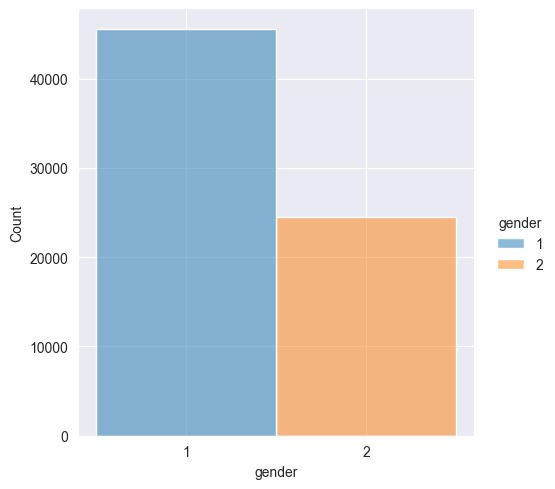

In [26]:
plt.figure(figsize = (8,8))
plot1 = sns.displot(x = "gender",
                    hue = "gender",
                    data = data,)
plot1.set_xlabel = "Gender"
plot1.set_ylabel = "Count"
plt.show()
